###  Titanic_train.csv 파일을 data라는 변수에 불러오기
필요한 패키지는 numpy / pandas / matplolib.pyplot

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

* titanic_train.csv  파일을 불러들이기. 특별한 조치 안 하고, 단순하게 불러오기!!! read_csv 활용

In [5]:
train = pd.read_csv("titanic_train.csv")

* head 를 이용해서 앞의 데이터가 제대로 들어 왔는지 확인하세요. 특히 index 가 제대로 생성이 되었는지를 중심으로 확인을 하세요!!!!

In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 받은 데이터의 간략적인 정보 확인하세요!!

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 데이터들에서 NaN이 없는지 확인!!!

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 중요!!!) scikit learn의 패키지에는 null 형식의 데이터를 처리하지 않기 때문에 이러한 데이터를 어떻게 처리할지에 대한 판단 및 기준은 상당히 중요함!!!!

* (컬럼)항목별로 이상한 데이터들의 비율을 계산하시오!!! ---> 실제로 많은 컬럼들이 있는 데이터들에서는 어느 컬럼을 사용하고, 어느 컬럼을 사용하지 말아야할지 사전에 파악을 하기 위하 용도임!!!!

In [10]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [11]:
for col in train.columns:
    print(str(col) +":"+ str(train[col].isnull().sum()/len(train))+"%")

PassengerId:0.0%
Survived:0.0%
Pclass:0.0%
Name:0.0%
Sex:0.0%
Age:0.19865319865319866%
SibSp:0.0%
Parch:0.0%
Ticket:0.0%
Fare:0.0%
Cabin:0.7710437710437711%
Embarked:0.002244668911335578%


### 참고 : 데이터 항목 설명  ->  null데이터 수정
[ surveved : 생존여부(0/1),   
Pclass : 티켓의 클래스(1은 1st, 2는 2nd ..),    
name : 승객이름,    
sex : 승객성별,      
Age : 승객나이,    
SibSp : 함께 탑승한 형재와 배우자의 수,      
parch : 함께 탑승한 부모, 아이의 수,       
ticket: 티켓번호,      
Fare: 탑승료,      
cabin : 객실번호,       
embarked :탑승항구(C:Cherboug, Q :Queenstown, S:south ampton)] 

In [12]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

* 변수 타입을 보고 수치형 중에서 연속형인 값들에 대해서 확인(Target은 0/1 카테고리이니) --> Age, SibSp, Parch, Fare  --> Tukey method 방식을 적용해서 2개 이상의 아웃라이어가 있는 데이터 선정하여 제거하고자 함.

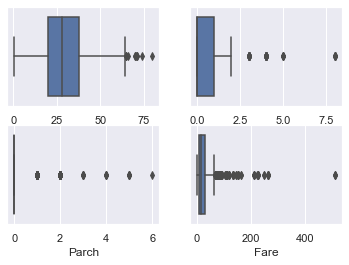

In [13]:
fig, ax = plt.subplots(2,2)
sns.boxplot(train['Age'], ax=ax[0,0])
sns.boxplot(train['SibSp'], ax=ax[0,1])
sns.boxplot(train['Parch'], ax=ax[1,0])
sns.boxplot(train['Fare'], ax=ax[1,1])

In [14]:
from collections import Counter
# by ) Tukey method (Tukey JW., 1977) 을 사용을 하고, 수치 데이터 아웃라이어가 2개 이상 발생 시 해당 데이터를 제거하기 위한 작업 중
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step =1.5*IQR 
        # col에서 양쪽 중 하나에 아웃라이어가 걸리는 데이터 가로인덱스...
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
                                # 범위가 벗어나는 조건...
        outlier_indices.extend(outlier_list_col)
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  
    # k 는 어느 데이터가(가로줄 인덱스) , v번 아웃라이어로 검색이 되었는지..
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age", "SibSp", "Parch", "Fare"])

In [15]:
Outliers_to_drop
# 3가지 이상 아웃라이어가 있는것들

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [16]:
# 각기 어느 부분에서 아웃라이어가 되었는지 확인
train.loc[Outliers_to_drop] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
# 아웃라이어인 것들을 제거를 하자!!!! --> 단순 빵구 값으로 제거가 아니라 아웃라이어 중첩된 것들을 제거하는 부분임!!!
train = train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


* 지금 간단히 빵구난 데이터 확인해보자!

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [20]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Feature Analysis

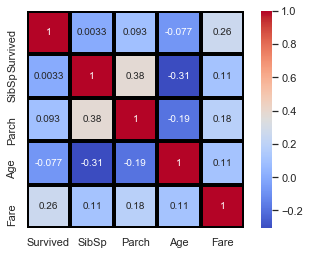

In [21]:
sns.heatmap(train.loc[:, ["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(),
            annot=True, cmap= 'coolwarm',
            linewidths=3, linecolor='black', fmt=".2g",square=True)

* 참고) 위의 결과를 보면 Traget인 Survived와 그나마 연관이 있어 보이는 것은 Fare가 된다(단순 수치적으로).    
그러나 중요한 부분은...<strong>나머지 변수들이 의미가 없다 </strong>는 것은 아니다!!!!!!

## 위의 나머지 변수들에 대해서 하나씩 확인을 해보면서  Survived와 관계를 좀 알아보자!!

### 01) SibSp : 세부적인 값들을 바탕으로 생존여부에 대한 것을 보자! -> 아래 그래프를 그려보고 알게 된 사실은?

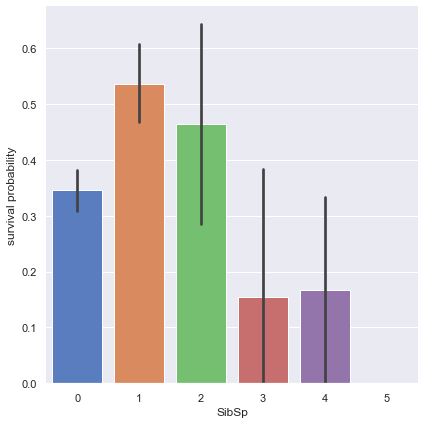

In [22]:
g = sns.catplot(x="SibSp", y="Survived", data=train, kind="bar", height = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

                * 해석) 위의 결과 SibSp의 값이 작을 수록 생존 확률이 높고, 3이상의 경우에 낮은 분포를 보이게 된다!!! --> 향후 이 부분에 대한 것을 바탕으로 변수를 변형을 하면 앞에서 단순히 안 보인 상관관계에 대한 것을 어느 정ㄷ 확보해나갈 수 있다!!!

### 02) Parch : 가족단위에 대해서 아래의 결과를 보고 위와 같이 해석을 해보자!

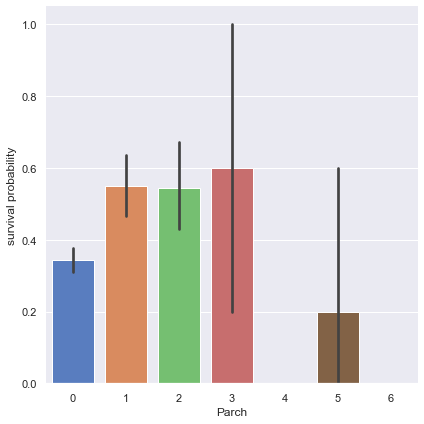

In [23]:
ax  = sns.catplot(x="Parch",y="Survived",data=train,kind="bar", height = 6 , palette = "muted")
ax.despine(left=True)
ax = ax.set_ylabels("survival probability")


                * 해석) 1~2(작은 가구)가 단독(0) , 3~4(중간가구), 5~6(대가족) 보다 높은 생존율이고, 3인 경우에서는 상당히 큰 표준편차를 나타내고 있음에 유의!!

### 03) Age : 아래와 같은 분포와 상관계수를 보자

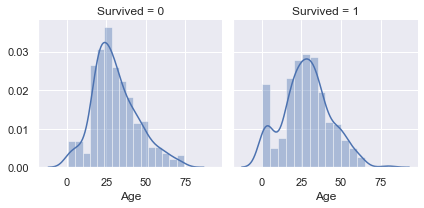

In [24]:
ax = sns.FacetGrid(train, col='Survived')
ax = ax.map(sns.distplot, "Age")

In [25]:
train.loc[:, ["Survived", "Age"]].corr()

,Survived,Age
Survived,1.000000,-0.076867
Age,-0.076867,1.000000


        * 해석 : 나이의 분포가 생존자와 비생존자 사이에 다르다. 생존자의 경우에는 어린아이대가 월등히 높은 반명, 사망자에는 나이드신 쪽이 높은 부분이 있음. 
            우선 분포상으로는 생존여부에 대한 차이가 있는 것으로 보이나, 위에서와 같이 단순히 상관계수만으로 보면 0.07로 거의 무시되는 부분이 된다는 것!!!`

`우선 분포상으로는 생존여부에 대한 차이가 있는 것으로 보이나, 위에서와 같이 단순히 상관계수만으로 보면 0.07로 거의 무시되는 부분이 된다는 것!!!`

### 03-추가) 분포를 겹치게 보자!  -> 그러면 더 명확하게 볼 수 있음!

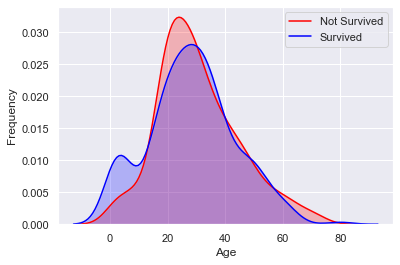

In [26]:
g = sns.kdeplot(train["Age"][(train["Survived"]==0) & (train["Age"].notnull())],
                color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"]==1) & (train["Age"].notnull())], 
                ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

### 04) Fare : 분포를 보자!!!! 상당히 큰 값이 많고, 그 범위가 넓다;;;;

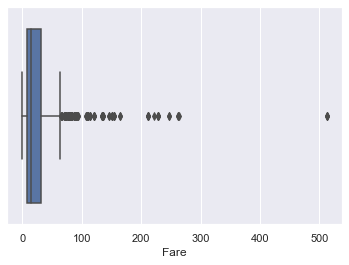

In [27]:
sns.boxplot(train['Fare'])

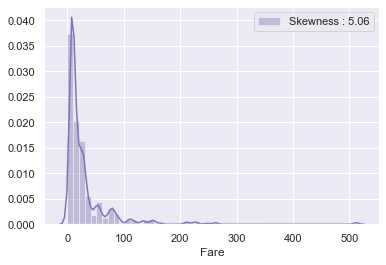

In [28]:
ax= sns.distplot(train["Fare"], color="m", label="Skewness : %.2f"%(train["Fare"].skew()))
ax = ax.legend(loc="best")

* 참고) skewness(왜도) : 얼마나 한 쪽으로 치우쳐졌는지에 대한 지표(데이터가 왼쪽에 많아서 오른쪽으로 꼬리가 기냐 +, 데이터가 오른쪽에 많아서 왼쪽으로 꼬리가 기냐  -) & 일반적으로 -2 ~ +2 사이를 치우침이 별로 없다고 판단하는 기준이 되기는 하지만...지금 이 경우에는 상당히 많은 치위침이 있음!!!

* 참고) skewness인 데이터는 변환을 해야하는 이유가 무엇이냐면 한쪽으로 너무 치우친 데이터를 학습을 하게 된다면 <strong>`꼬리 부분이 상대적으로 적고 빈도도 아주 높지 않기 때문에 이러한 부분에 대한 학습이 잘 이루어지지 않는다.`</strong> 그러므로 유의미한 값이라고 한다면 이러한 특성이 잘 학습이 안 되는 경향이 있을 수 있음!!! <strong>`특히나 요금은 객실과 관련이 있고, 객실의 경우에는 생존에도 영향을 미치는 부분이기에 이러한 영향력을 제대로 학습을 하기 위해서는 그냥 처리하면 안 될 수 있다!!!!`</strong>

* 참고) `왼쪽의 데이터가 많은 경우(좌고 우하) : root, log10`      
    `오른쪽 데이터가 많은 경우(좌하 우고) : 제곱, log2`

* 참고) 위의 경우에는 좌고 우하의 경우이므로 이러한 경우에 주로 log10을 주로 사용해서 변환을 하니 사용해 보자!!

### 4-추가) log변환하여 분포를 좀 고르게 피자~--> 아래와 같이 skewness를 줄여보자!

In [29]:
train["Fare"] = train["Fare"].apply(lambda x: np.log(x) if x>0 else 0)

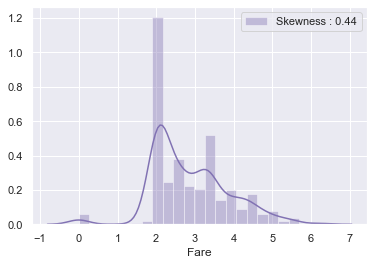

In [30]:
ax= sns.distplot(train["Fare"], color="m", label="Skewness : %.2f"%(train["Fare"].skew()))
ax = ax.legend(loc="best")

### 5) Sex : 성별에 따른 차이는.

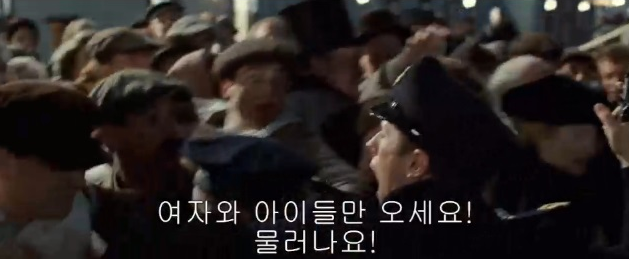

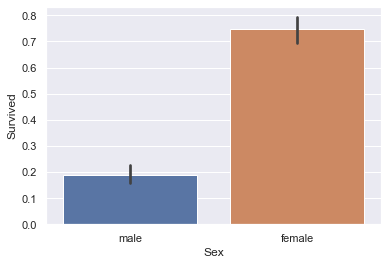

In [31]:
sns.barplot(x=train["Sex"], y=train["Survived"])

In [32]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


    * 해석 : 명확하게 성별에 따른 차이가 발생을 함!!! ---> 우리의 타겟에 대한 중요한 변수임!!

### 6) PClass

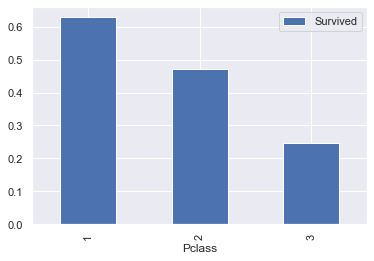

In [33]:
train.loc[:,["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot(kind="bar")

* 등급별로 남자/여자 따로 볼 경우

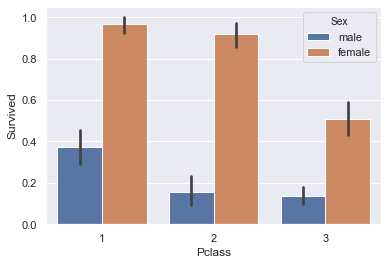

In [34]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train)

* 결론 : 1,2 등급은 큰 차이가 없으나, 3등급의 경우에는 생존확률도 낮고, 남성의 경우 1등실이 월등히 높은 생존율

### 7) Embarked : 빠진 데이터 수 확인 --> 제일 많이 나타나는 종류 확인 --> 이를 바탕으로 빠진 데이터 채우기 ---> 각기 항목별 생존여부와 확인하기!!!

In [35]:
print("Embarked 빠진 데이터 수 : {0}".format(train["Embarked"].isnull().sum()))

Embarked 빠진 데이터 수 : 2


In [36]:
train["Embarked"].value_counts()

S    634
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
# 빈데이터를 S로 변환
train["Embarked"] = train["Embarked"].fillna("S")

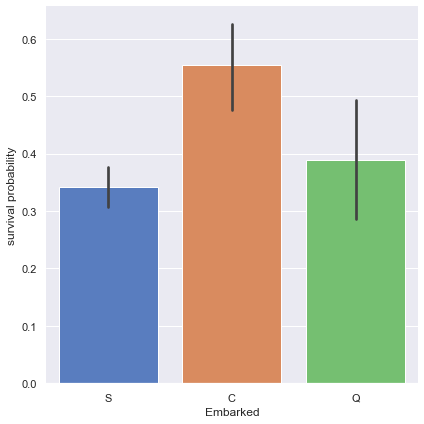

In [38]:
g = sns.catplot(x="Embarked", y="Survived",  data=train,
                   height=6, kind="bar", palette="muted").despine(left=True)
g.set_ylabels("survival probability")

`해석` : C항구가 높은것을 볼 수 있다 --> 왜 항구별/지역별로 다른 이유가 무엇인가??

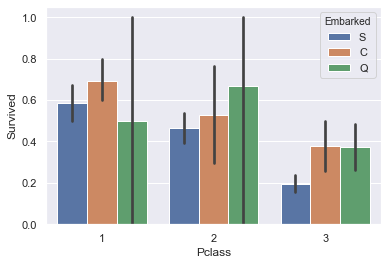

In [39]:
sns.barplot(x="Pclass", y="Survived", hue="Embarked", data=train)

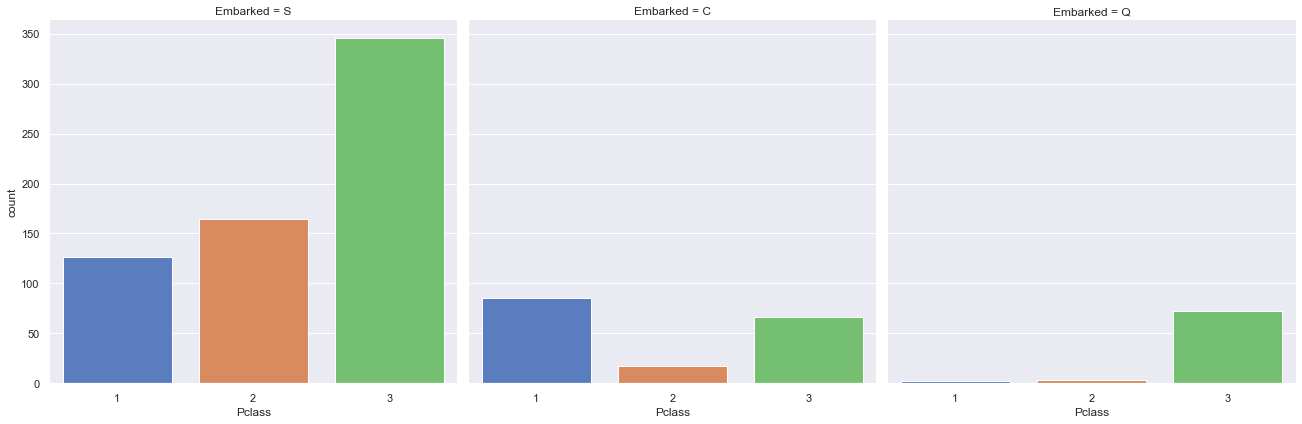

In [40]:
sns.catplot("Pclass", col="Embarked",  data=train, height=6, kind="count", palette="muted")

`해석 : ` 항구별로 생존률이 다른 부분을 찾아보니, C항구 출발자들의 객실등급이 월등히 1등석에 비율이 높다!!!!!

## 빵꾸 찾으러 고고!!

### 01) Embarked : 앞에서 1개 빈 값이 있어서 해결을 함 --> 1개이기에 버릴 수 있고, 중간값/평균값/최빈값 등으로 채울 수 있음!

### 02) Age : 많은 데이터가 빠져 있음;;; --> 위에서 보면, 어린 나이 생존자 비율 높고, 고령자 생존 비율 낮고..등 유의한 일부 결과들이 존재를 함;;;;;;아오... --> 그러면 이 특징을 유지해야 하고, 빵구 때워야 한다;;;

In [41]:
train["Age"].isnull().sum()

170

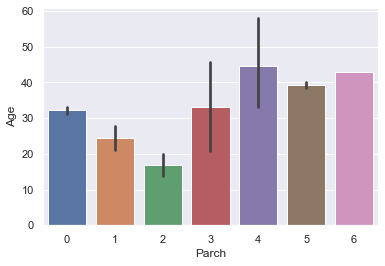

In [42]:
sns.barplot(y="Age", x ="Parch", data=train)

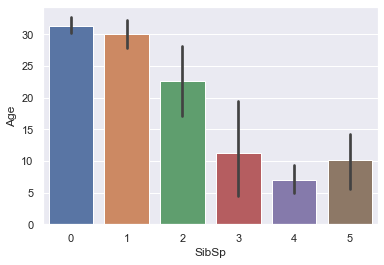

In [43]:
sns.barplot(y="Age", x ="SibSp", data=train)

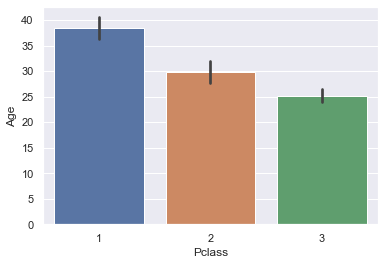

In [44]:
sns.barplot(y="Age", x ="Pclass", data=train)

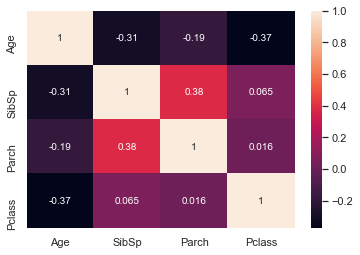

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.heatmap(train.loc[:,["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True, ax=ax)

In [46]:
# 나이 데이터가 빠진 가로줄 인덱스들,,,,,,시밧비밧기밧시밧시밧시밧시밧시밧시밧시밧시밧시밧
index_NaN_age = list(train["Age"][train["Age"].isnull()].index)

# 각 컬럼에 대한 세로줄에 대한 위치정보...
age_idx = train.columns.get_loc("Age")
SibSp_idx = train.columns.get_loc("SibSp")
Parch_idx = train.columns.get_loc("Parch")
Pclass_idx = train.columns.get_loc("Pclass")

for i in index_NaN_age :
    age_med = train["Age"].median()
    #예측값
    age_pred = train["Age"][(train["SibSp"]==train.iloc[i, SibSp_idx]) & 
                            (train["Parch"]==train.iloc[i, Parch_idx]) & 
                            (train["Pclass"]==train.iloc[i, Pclass_idx])].median()
    if not np.isnan(age_pred) :
        train.iat[i, age_idx] = age_pred
    else :
        train.iat[i, age_idx]  = age_med
# 주어져있는 다른 컬럼들의 특성을 기준(내 컬럼 특성과 유사한 값) 으로 NAN값을 채우는 것

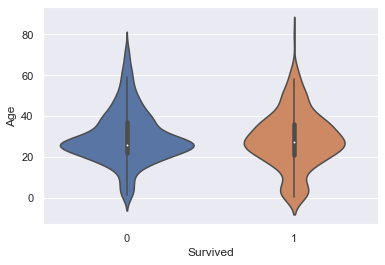

In [47]:
sns.violinplot(x="Survived", y ="Age",data =train, kind="violin")

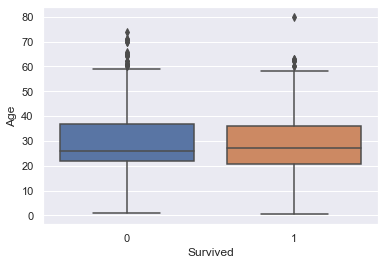

In [48]:
sns.boxplot(x="Survived", y ="Age",data =train)

`해석 :` 중간값은 생존에 큰 차이가 없음...다만 어린 나이가...

### 03) Cabin

In [49]:
train["Cabin"].describe()

count     201
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [50]:
train["Cabin"].isnull().sum()

680

In [51]:
train["Cabin"] = train["Cabin"].fillna("X")
train["Cabin"] = train["Cabin"].apply(lambda x: str(x)[:1])
train["Cabin"].isnull().sum()

0

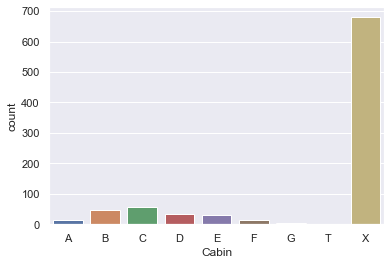

In [52]:
sns.countplot(train["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

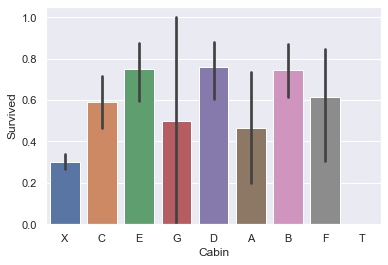

In [53]:
sns.barplot(y="Survived",x="Cabin",data=train)

`해석 :` 객실 번호가 없는 X가 생존 비율이 차이가.;;; 이는 아마도 객실이 아니라 외부에 그냥 탑승한 인원들이 더 빨리 바다로 뛰어들 수 있어서 그런듯...
지우는 것 보다는 라벨인코딩이나, 아니면 객실정보가 있냐/없냐로 할 수 있을 듯..

## 새로운 지표 만들기

In [54]:
train["Fsize"] = train["SibSp"] + train["Parch"] + 1

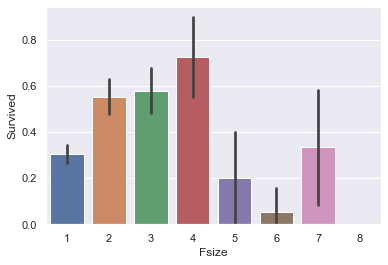

In [55]:
sns.barplot(y="Survived",x="Fsize",data=train)

`해석 `: 위의 경우를 보면 가족 사이즈 별로 상당히 생존률이 영향을 미치는 것으로 보임...--> 다시 재구조를 하자!!

In [56]:
# Fsize = 1
train['Single'] = train["Fsize"].apply(lambda x: 1 if x==1 else 0)
# Fsize = 2
train['SmallF'] = train["Fsize"].apply(lambda x: 1 if x==2 else 0)
# Fsize = 3,4
train['MedF'] = train["Fsize"].apply(lambda x: 1 if 3<=x<=4 else 0)
# Fsize = 5이상
train['LargeF'] = train["Fsize"].apply(lambda x: 1 if x>=5 else 0)

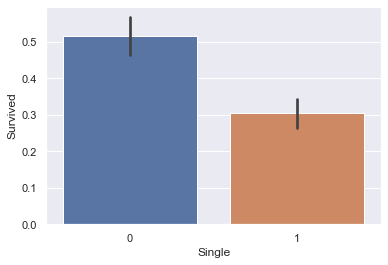

In [57]:
sns.barplot(x=train["Single"], y=train["Survived"])


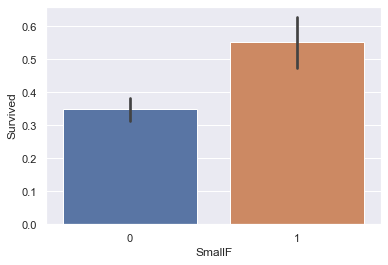

In [58]:
sns.barplot(x=train["SmallF"], y=train["Survived"])


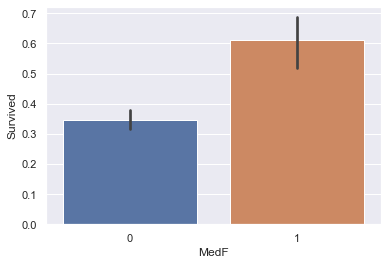

In [59]:
sns.barplot(x=train["MedF"], y=train["Survived"])


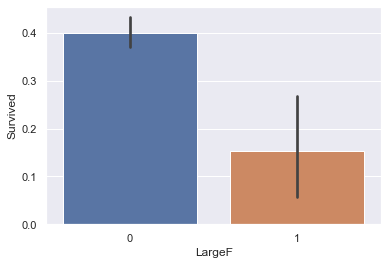

In [60]:
sns.barplot(x=train["LargeF"], y=train["Survived"])


## 전처리

In [61]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [62]:
def titanic_fillna(df):
    # 앞에서 해결
    return df


##### 불필요 컬럼 제거

In [63]:
# "PassengerId", "Name", "Ticket" 컬럼 지우기..
def drop_feature(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

##### 인코딩

In [64]:
def format_features(df):
    # 변경할 컬럼 리스트    
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df.loc[:, feature])
        df.loc[:, feature] = le.transform(df.loc[:, feature])
    return df  

##### 위의 전처리 들을 하나의 함수로 다시 묶는 부분

In [65]:
def titanic_transform(df):
    df = titanic_fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return df

In [66]:
X_titanic_train = titanic_transform(train)
X_titanic_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fsize,Single,SmallF,MedF,LargeF
0,0,3,1,22.0,1,0,1.981001,8,2,2,0,1,0,0
1,1,1,0,38.0,1,0,4.266662,2,0,2,0,1,0,0
2,1,3,0,26.0,0,0,2.070022,8,2,1,1,0,0,0


In [67]:
y_titanic_train = X_titanic_train.iloc[:,0]
X_titanic_train =X_titanic_train.iloc[:,1:]

### 데이터 분리

In [68]:
from sklearn.model_selection import train_test_split

#### 그냥 분리

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, 
                                                    y_titanic_train, 
                                                    stratify = y_titanic_train,
                                                    test_size=0.3, 
                                                    random_state=1234)

In [70]:
from sklearn.model_selection import KFold

In [71]:
# shuffle는 순서에 대해서도 섞에서 랜덤하게..
kfold = KFold(n_splits=5, random_state= 0, shuffle = True)

## 모델링

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### RF)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=1234)

In [75]:
scores = cross_val_score(
    rf_clf,
    X_train,
    y_train,
    cv=kfold,
    scoring="accuracy"
)
for iter_count, accuracy in enumerate(scores):
    print("RF 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("----------------------------------------")
# print("교차 검증 평균 정확도 :" ,scores.mean())
print("RF 교차 검증 평균 정확도 :{0:.4f}".format(scores.mean()) )

RF 교차 검증 0 & 정확도 0.7661
RF 교차 검증 1 & 정확도 0.8537
RF 교차 검증 2 & 정확도 0.8455
RF 교차 검증 3 & 정확도 0.7805
RF 교차 검증 4 & 정확도 0.7642
----------------------------------------
RF 교차 검증 평균 정확도 :0.8020


# 이거 찾아보기

In [76]:
rf_param_grid = {
    "n_estimators":[100,500],
    "max_depth": np.arange(1,20,1),
    "min_samples_split" : [2,3,4,5,6],
    "min_samples_leaf" : [1,2,3,4,5],
    "max_features": np.arange(1, 8,1)
    
}

In [77]:
n_iter_search = 10
RFC_rgs = RandomizedSearchCV(
    rf_clf,
    param_distributions = rf_param_grid,
    cv=kfold,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    random_state=1234,
    n_iter =n_iter_search
)
RFC_rgs.fit(X_train, y_train)
RFC_rgs_best = RFC_rgs.best_estimator_
print(RFC_rgs_best)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)


In [78]:
RFC_rgs.best_score_

0.8214266981379492

In [79]:
RFC_rgs.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 4,
 'max_depth': 18}

In [104]:
rf_param_grid = {
 'n_estimators': [490,500,510],
 'min_samples_split': [4,5,6],
 'min_samples_leaf': [2,3,4],
 'max_features': [3,4,5],
 'max_depth': [15,16,17,18,19]
}

In [105]:
RFC_gs = GridSearchCV(rf_clf, param_grid=rf_param_grid,cv=kfold,
                     scoring="accuracy", n_jobs=-1, verbose=1)
RFC_gs.fit(X_train, y_train)

RFC_gs_best = RFC_gs.best_estimator_
print(RFC_gs_best)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  4.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=490,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)


In [106]:
RFC_gs.best_params_

{'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 490}

In [107]:
RFC_gs.best_score_

0.8295436664044061

In [108]:
rfc_predictions = RFC_gs_best.predict(X_test)
accuracy = accuracy_score(y_test, rfc_predictions)
print("rf에서 GridSearchCV로 찾은 결과 : {0: .4f}".format(accuracy))

rf에서 GridSearchCV로 찾은 결과 :  0.8453


train 보다 test가 좋게 나오는거 -> 운이 크다, 학습이 제대로 안되어 있을 수 있다.

### Xgboost)

In [85]:
import xgboost as xgb
from xgboost import XGBClassifier

In [86]:
XGBC = XGBClassifier(random_state=1234, n_jobs=-1)

xgc_param_grid = {
    "n_estimators" : np.arange(10, 500, 20), #많이 하면 좋은데 오래 걸려서 적당하게 선정을 해야됨 10부터 500까지 20단위로
    "learning_rate" : [0.01,0.1,0.2, 0.5, 1], #오차 범위?
    "max_depth" : np.arange(1,20,1),
    "subsample" : [0.5, 0.6, 0.7,0.8, 0.9, 1.0]
}


In [87]:
n_iter_search = 50
xgb_rgs = RandomizedSearchCV(XGBC,
                             param_distributions= xgc_param_grid,
                             cv = kfold,
                             scoring="accuracy", #평가지표,,, 다른 평가지표의 목적이 뭔지 알것!
                             n_jobs = -1,
                             verbose = 1,
                             random_state = 42,
                             n_iter = n_iter_search # 반복해서 할거
)
xgb_rgs.fit(X_train, y_train)

xgb_rgs_best = xgb_rgs.best_estimator_
print(xgb_rgs_best)
print(xgb_rgs.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    5.2s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=370, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)
0.8246918436926304


In [88]:
xgb_rgs.best_params_

{'subsample': 0.7, 'n_estimators': 370, 'max_depth': 6, 'learning_rate': 0.01}

In [109]:
xgc_param_grid = {
    'subsample' : [0.63, 0.64, 0.65, 0.66,0.67],
    'n_estimators' : [330, 340, 350, 360, 370],
    'max_depth': [4,5,6,7], 
    'learning_rate': [0.005,0.01,0.015]
                }

In [110]:
xgb_gs = GridSearchCV(XGBC, param_grid=xgc_param_grid,
                     cv=kfold, scoring="accuracy", n_jobs=-1, verbose=1
                     )
xgb_gs.fit(X_train,y_train)

xgb_gs_best = xgb_gs.best_estimator_
print(xgb_gs_best)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   43.5s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.015, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=330, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.65, verbosity=1)


In [111]:
xgb_gs.best_score_

0.8327956989247312

In [112]:
xgb_predictions = xgb_gs_best.predict(X_test)
accuracy = accuracy_score(y_test, xgb_predictions)
print("xgb에서 GridSearchCV로 찾은 결과 : {0: .4f}".format(accuracy))

xgb에서 GridSearchCV로 찾은 결과 :  0.8453


* --> test와 train의 갭이 좀 큰것으로 보아서...overfitting이 되었을 것 같음...

### lightGBM)

In [93]:
from lightgbm import LGBMClassifier

In [94]:
LGB_clf = LGBMClassifier(random_state=1234, n_job=-1)

lb_param_grid = {
    "n_estimators" : np.arange(10, 2000, 10), #                           500
    "learning_rate" : [0.00001,0.0001,0.01, 0.1, 0.2, 0.5, 1], #오차를 줄여야하니깐      5
    "max_depth" : np.arange(1,20,1), #약 분류기를 얼마나 할건지           20 
    "subsample": [0.1,0.2,0.3,0.5, 0.7, 0.9, 1] #피처들에 있어 어느정도 줄임을 쓸건지 4
}

In [95]:
n_iter_search = 200

LGB = RandomizedSearchCV(LGB_clf,
                             param_distributions= lb_param_grid,
                             cv = kfold,
                             scoring="accuracy", #평가지표,,, 다른 평가지표의 목적이 뭔지 알것!
                             n_jobs = -1,
                             verbose = 1,
                             random_state = 42,
                             n_iter = n_iter_search # 반복해서 할거
            
)
LGB.fit(X_train, y_train)
LGB_rgs_best = LGB.best_estimator_
print(LGB_rgs_best)
print(LGB.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   44.5s finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1700, n_job=-1, n_jobs=-1, num_leaves=31,
               objective=None, random_state=1234, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.9, subsample_for_bin=200000,
               subsample_freq=0)
0.8262916338840807


In [96]:
LGB.best_params_

{'subsample': 0.9, 'n_estimators': 1700, 'max_depth': 6, 'learning_rate': 0.01}

In [116]:
# 좀 오래 걸릴 수 있어서 좀 더 작은 범위 내에서 조정 필요...
lb_param_grid = {
    'subsample': [0.3,0.5,0.7,0.9],
    'n_estimators': [2350,2400,2450],
    'max_depth': [2,3,4,5], 
    'learning_rate': [0.0005,0.001,0.015]
}

In [117]:
LGB_gs = GridSearchCV(LGB_clf, param_grid=lb_param_grid,
                     cv=kfold, scoring="accuracy", n_jobs=-1, verbose=1
)

LGB_gs.fit(X_train, y_train)
LGBM_gs_best = LGB_gs.best_estimator_
print(LGBM_gs_best)
print(LGB_gs.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   46.6s finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.001, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2400, n_job=-1, n_jobs=-1, num_leaves=31,
               objective=None, random_state=1234, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.3, subsample_for_bin=200000,
               subsample_freq=0)
0.8311696826645687


In [118]:
LGBM_gs_best = LGB_gs.best_estimator_

lgb_predictions = LGBM_gs_best.predict(X_test)
accuracy = accuracy_score(y_test, lgb_predictions)
print("lgb에서 GridSearchCV로 찾은 결과 : {0: .4f}".format(accuracy))

lgb에서 GridSearchCV로 찾은 결과 :  0.8340


In [100]:
0.8453

0.8453

### 앞에서 한 모델들의 종합

In [119]:
RFC_gs_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=490,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [120]:
xgb_gs_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.015, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=330, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.65, verbosity=1)

In [121]:
LGBM_gs_best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.001, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2400, n_job=-1, n_jobs=-1, num_leaves=31,
               objective=None, random_state=1234, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.3, subsample_for_bin=200000,
               subsample_freq=0)

### 변수 중요도 그림..

#### 변수 중요도 그릴 함수 만들기...

In [121]:
# 내가 임의로 정해면 알아서 나오게끔
# 입력 : 
# --> ftr_importances_values --> 어떤 모델인지....   ,  
# --> ftr_importances --> 컬럼 정보를 위한 X_train, 
# --> ftr_top top --> 몇 개를 볼지... 

# 전제조건 : 모델은 tree based model로 변수 중요도를 제시할 수 있는 모델...
def plot_feature_importances(model, X_train, top_num=5):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns) # 가로 세로 맵핑
    ftr_top = ftr_importances.sort_values(ascending=False)[:top_num] #상위 데이터를 긁어옴
    
    plt.figure(figsize=(8,6))
    plt.title('Feature importances Top '+str(top_num))
    sns.barplot(x=ftr_top , y = ftr_top.index)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, top_num)
    plt.show()
    
    

#### RF 변수 중요도

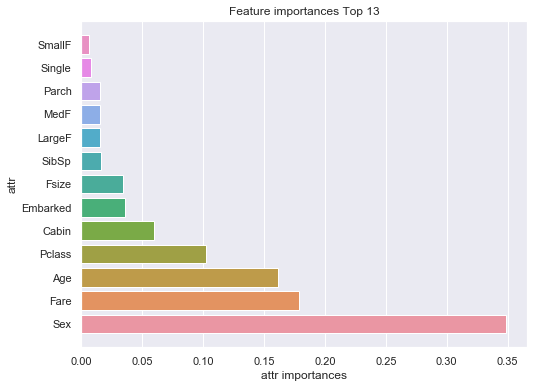

In [123]:
plot_feature_importances(RFC_gs_best, X_train, top_num=len(X_train.columns))

#### Xgboost 변수 중요도

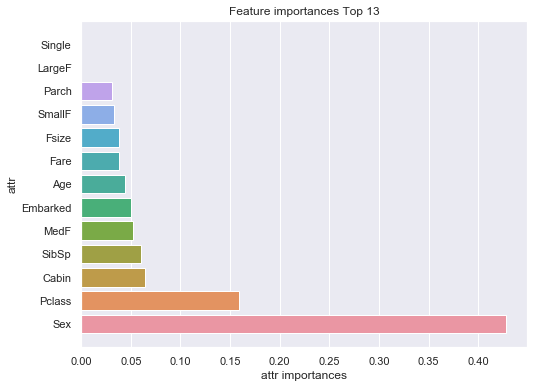

In [128]:
plot_feature_importances(xgb_gs_best, X_train, top_num=len(X_train.columns))

#### LightGBM

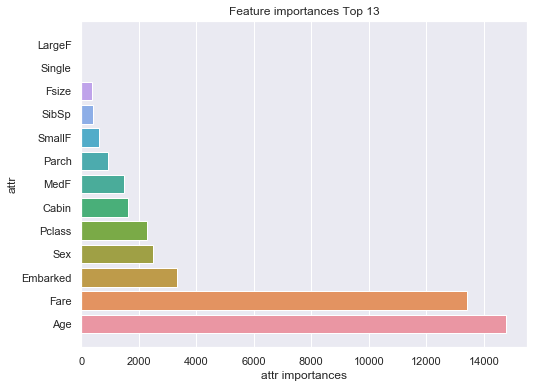

In [129]:
plot_feature_importances(LGBM_gs_best, X_train, top_num=len(X_train.columns))

## 모델 저장 & 불러오기

### 필요한 패키지

In [122]:
import joblib

### 모델 내보내기

In [125]:
# 무슨 모델을 , 어디로 빼낼 것인지
joblib.dump(LGBM_gs_best, "LGBM_best_model.pkl")

# rf모델을 내보내기..

['LGBM_best_model.pkl']

### 모델 불러오기

In [134]:
rf_best_p = joblib.load("rf_best_model.pkl")

In [135]:
RFC_gs_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [136]:
rf_best_p

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [137]:
# 정말로 같은 모델인지 X_test 에서 확인해보자~~
print((RFC_gs_best.predict(X_test)==rf_best_p.predict(X_test)).sum())
print(len(X_test))

265
265


## Voting

### 이미 각 모델로 최적화를 하였으니....수동으로 구현해보자..

참고) 각기 모델별로 상관계수 등을 활용을 해서, 보팅에 사용할 다른 것들을 선정을 하게 됨!!! 여기서는 거의 비슷한 것들이라서.. --> 여기서는 많이 만들지 않아서 보팅의 효과가 적을 수 있음;;;;이런 경우에는 좀 더 많은 모델을 만들게 됨!!!

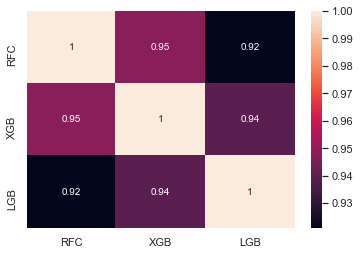

In [138]:
test_Survived_RFC = pd.Series(RFC_gs_best.predict(X_test), name="RFC")
test_Survived_XGB = pd.Series(xgb_gs_best.predict(X_test), name="XGB")
test_Survived_LGB = pd.Series(LGBM_gs_best.predict(X_test), name="LGB")
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_XGB,test_Survived_LGB],axis=1)
sns.heatmap(ensemble_results.corr(),annot=True)

In [140]:
x_test_model_total=X_test.copy(deep=True)
x_test_model_total["RFC"]= RFC_gs_best.predict(X_test)
x_test_model_total["XGB"]= xgb_gs_best.predict(X_test)
x_test_model_total["LGB"]= LGBM_gs_best.predict(X_test)
x_test_model_total.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fsize,Single,SmallF,MedF,LargeF,RFC,XGB,LGB
791,3,0,30.0,1,1,3.184284,8,2,3,0,0,1,0,0,0,0
856,2,0,27.0,1,0,2.628884,8,0,2,0,1,0,0,1,1,1
363,1,1,25.0,1,0,4.015332,4,0,2,0,1,0,0,1,1,1
320,3,1,61.0,0,0,1.830579,8,2,1,1,0,0,0,0,0,0
631,3,0,41.0,0,5,3.681036,8,2,6,0,0,0,1,0,0,0


In [151]:
x_test_model_total.iloc[10:20:]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fsize,Single,SmallF,MedF,LargeF,RFC,XGB,LGB,ensemble_voting,y_real
172,3,1,18.0,1,1,2.061048,8,2,3,0,0,1,0,0,0,0,0,0
335,2,1,28.0,0,0,2.564949,8,2,1,1,0,0,0,0,0,0,0,0
20,2,1,35.0,0,0,3.258097,8,2,1,1,0,0,0,0,0,0,0,0
216,2,1,27.0,0,0,2.564949,8,2,1,1,0,0,0,0,0,0,0,0
118,2,1,21.0,2,0,4.297285,8,2,3,0,0,1,0,0,0,0,0,0
733,1,1,38.5,0,0,3.401197,3,2,1,1,0,0,0,0,1,1,1,1
622,3,1,26.0,0,0,2.045536,8,1,1,1,0,0,0,0,0,0,0,0
225,1,0,35.0,1,0,4.424547,2,2,2,0,1,0,0,1,1,1,1,1
124,3,1,26.0,0,0,2.047693,8,1,1,1,0,0,0,0,0,0,0,0
711,3,1,26.0,0,0,2.740840,8,1,1,1,0,0,0,0,0,0,0,0


### 잠시 수동으로 만들 때 필요한 collections 에 대해서 알아보자..

In [141]:
import collections


In [152]:
collections.Counter([0,0,1,1,1])

Counter({0: 2, 1: 3})

In [153]:
collections.Counter([0,0,1,1,1]).items()

dict_items([(0, 2), (1, 3)])

In [143]:
# 제일 많이 나타있는 순서대로 sorting 1이 3번 0이 2번
collections.Counter([0,0,1,1,1]).most_common()

[(1, 3), (0, 2)]

In [144]:
# 리스트이기때문에 첫번째 출력
collections.Counter([0,0,1,1,1]).most_common()[0]

(1, 3)

### 직접 구현

In [145]:
import collections, numpy

#### 주의!!! 3개로 했으니 기준이 2가 된다!!!!!
# 내가 원하는 voting기를 만들수 있어야 한다
def vote_func(x, best_model_idx=0):
    p = collections.Counter(x)
    if p.most_common()[0][1] >=2:
        return(p.most_common()[0][0])
    else:
        print("Check!!!! Voting Result!!!")
        return(x[best_model_idx])

In [154]:
x_test_model_total["ensemble_voting"]=x_test_model_total.loc[:,["RFC","XGB","LGB"]].apply(lambda x: vote_func(x), axis=1)
x_test_model_total["y_real"] = y_test
show_col_list = ["RFC","XGB","LGB","ensemble_voting","y_real"]

x_test_model_total.loc[:, show_col_list]


,RFC,XGB,LGB,ensemble_voting,y_real
791,0,0,0,0,0
856,1,1,1,1,1
363,1,1,1,1,1
320,0,0,0,0,0
631,0,0,0,0,0
...,...,...,...,...,...
129,0,0,0,0,0
813,0,0,0,0,1
744,1,1,1,1,1
384,0,0,0,0,1


In [155]:
accuracy_score(x_test_model_total["y_real"], x_test_model_total["ensemble_voting"])

0.8415094339622642

### scikit learn 사용해서 자동으로하기..

#### 이것은 최적화한 모델들을 다시 X_train에서 그냥 통으로 돌리는 결과임;;;;;;ㅠㅠ
--> 아래에도 있지만 파라미터 튜닝에 제약이 발생을 함;;;

In [156]:
from sklearn.ensemble import VotingClassifier

In [158]:
eclf = VotingClassifier(
    estimators=[("RF", RFC_gs_best),
               ("XGB", xgb_gs_best),
               ("LGB", LGBM_gs_best)],
    voting="hard"
)

eclf.fit(X_train,y_train)
eclf_pred = eclf.predict(X_test)
accuracy=accuracy_score(y_test, eclf_pred)
print("Hard Voting 에서로 찾은 결과 : {0: .4f}".format(accuracy))

# 이미 최적화가 되어있는 학습을 다시 학습을 해야하는 번거로움
# 사이킷런으로 통으로 돌리기는 좋긴한데 문제가 발생할 수 있음
# 파라미터가 잘 안먹는 경우가 있다.

Hard Voting 에서로 찾은 결과 :  0.8415


#### scikit learn에서는 미리 최적화 된 것들을 가지고 하는 것이 없다;;;
mlxtend에서는 있음!!!

In [159]:
from mlxtend.classifier import EnsembleVoteClassifier

In [163]:
                                #classifier
# 재 학습할 필요 없이 조합 -> 아래
eclf = EnsembleVoteClassifier(clfs=[RFC_gs_best,
                                   xgb_gs_best,
                                   LGBM_gs_best],
                              voting = "hard",
                              refit = False   # --> 다시 학습을 필요가 없음
                             )
eclf.fit(X_train, y_train)
accuracy_score(y_test, eclf.predict(X_test))

# 다시 조합에 대해 재학습을 할건지 or 결과들만 가지고 조합을 할건지

0.8415094339622642

In [164]:
# 참고) 직접 구한 것과 비교..
accuracy_score(x_test_model_total["y_real"], x_test_model_total["ensemble_voting"])

0.8415094339622642

#### 이것을 그러면 HyperParameterTunning을 하려면;;;  --> votingclassfirer에서 한 번에 여러 모델을 같이 고려하면서 HyperParameterTunning이 안 된다;;;제약적으로 되기에 좀 문제가 있어서...잘 사용을 안 한다;;;이유는 gridsearch 계열에서 각기 모델별로 반영을 하면서 하지를 않아서임;;;;;;ㅠㅠ

In [166]:
#  아래는 되는 조합이지만, 이 중에 하나라도 풀면 안 되는 조합이 된다;;ㅜㅜㅜ

from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs= [ rf_clf, XGBC, LGB_clf],voting='hard')

vclf_params = {
    "randomforestclassifier__n_estimators" : [100,500],
    "randomforestclassifier__max_depth" : np.arange(1,20,1),
    "randomforestclassifier__min_samples_split" : [2,3,4,5,6],
    "randomforestclassifier__min_samples_leaf" : [1,2,3,4,5],
    "randomforestclassifier__max_features" : np.arange(1,8,1),
    
    
    # XGBClassifier
     'xgbclassifier__n_estimators' :np.arange(10, 500,20),
     'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.5, 1],              
     'xgbclassifier__max_depth': np.arange(1,20,1),
     'xgbclassifier__min_child_weight':[1,5,10],
     'xgbclassifier__gamma': [0.01, 0.1, 1, 1.5, 2,3,5,10],
    
    # 데이터 변형 시 오류가 발생하여 사용하지 않음;;;
     #'xgbclassifier__subsample':[0.5, 0.6, 0.7, 0.9, 0.8, 1.0],
    
    
#     LGBMClassifier
#      'lgbmclassifier__n_estimators' :np.arange(10, 1000, 20),
     'lgbmclassifier__learning_rate': [0.01, 0.1, 0.2, 0.5],              
#     'lgbmclassifier__max_depth': np.arange(1,20,1),
#     'lgbmclassifier__min_child_weight':[1,5,10],        
#     'lgbmclassifier__subsample':[0.5, 0.6, 0.7, 0.9, 0.8, 1.0]
    
}

# 위에 주석을 풀고 돌리게 된다면 에러가난다 -> 아직까지 RandomizedSearchCV가 동적으로 전체를 지원 못하기 때문에...
# 사용자들이 요구하기 때문에 미래에는 가능하지만, 현재는 불가능....

n_iter_search = 10
vclf_rgs = RandomizedSearchCV(eclf,
                             param_distributions = vclf_params,
                             cv=kfold,
                             scoring="accuracy",
                             n_jobs = -1,
                             verbose = 1,
                             random_state=14,
                             n_iter = n_iter_search)
vclf_rgs.fit(X_train, y_train)

vcf_rgs_best = vclf_rgs.best_estimator_
print(vcf_rgs_best)
print(vclf_rgs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.0s finished


EnsembleVoteClassifier(clfs=[RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=10,
                                                    max_features=5,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=4,
                                                    min_samples_split=6,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators

In [167]:
#  아래는 되는 조합이지만, 이 중에 하나라도 풀면 안 되는 조합이 된다;;ㅜㅜㅜ

eclf = VotingClassifier(estimators=[('rf', rf_clf), ('xg', XGBC), ('lg', LGB_clf)],
                        voting='hard')

vclf_params = {
    "rf__n_estimators" : [100,500],
    "rf__max_depth" : np.arange(1,20,1),
    "rf__min_samples_split" : [2,3,4,5,6],
    "rf__min_samples_leaf" : [1,2,3,4,5],
    "rf__max_features" : np.arange(1,8,1),
    
    'xg__n_estimators' :np.arange(10, 500,20),
    'xg__learning_rate': [0.01, 0.1, 0.2, 0.5, 1],              
    'xg__max_depth': np.arange(1,20,1),
    'xg__min_child_weight':[1,5,10],
    'xg__gamma': [0.01, 0.1, 1, 1.5, 2,3,5,10],
#     'xg__subsample':[0.5, 0.6, 0.7, 0.9, 0.8, 1.0],
    
#      'lg__n_estimators' :np.arange(10, 1000, 20),
#     'lg__learning_rate': [0.01, 0.1, 0.2, 0.5, 1],              
#     'lg__max_depth': np.arange(1,20,1),
    'lg__min_child_weight':[1,5,10],        
#      'lg__subsample':[0.5, 0.6, 0.7, 0.9, 0.8, 1.0]
    
}

n_iter_search = 10
vclf_rgs = RandomizedSearchCV(eclf,
                             param_distributions = vclf_params,
                             cv=kfold,
                             scoring="accuracy",
                             n_jobs = -1,
                             verbose = 1,
                             random_state=14,
                             n_iter = n_iter_search)
vclf_rgs.fit(X_train, y_train)

vcf_rgs_best = vclf_rgs.best_estimator_
print(vcf_rgs_best)
print(vclf_rgs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.6s finished


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=16,
                                                     max_features=2,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=5,
                                                     min_weight_fraction_leaf=0.0,
               

## 평가

In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
confusion_matrix(y_test, x_test_model_total["RFC"])

array([[153,  10],
       [ 30,  72]], dtype=int64)

* 위의 결과 해석   
TN : 153 ( Real - Negative, Predict - negative)  
FP : 10 ( Real - Negative, Predict - Positive )   
FN : 31 ( Real - Positive, Predict - Negative)   
TP : 71 (Real - Positive, Predict - Positive)

In [172]:
confusion_matrix(y_test, x_test_model_total["XGB"])

array([[150,  13],
       [ 29,  73]], dtype=int64)

In [173]:
confusion_matrix(y_test, x_test_model_total["LGB"])

array([[151,  12],
       [ 31,  71]], dtype=int64)

In [174]:
confusion_matrix(y_test, x_test_model_total["ensemble_voting"])

array([[151,  12],
       [ 30,  72]], dtype=int64)

### 기본적인 수치 확인

In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score,recall_score

In [176]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print("Confusion Matrix")
    print(confusion)
    print("정확도 : {0:.4f},  정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1-Score : {3:.4f}".format(accuracy, precision, recall,f1))

In [177]:
get_clf_eval(y_test,x_test_model_total["RFC"] )

Confusion Matrix
[[153  10]
 [ 30  72]]
정확도 : 0.8491,  정밀도 : 0.8780, 재현율 : 0.7059, F1-Score : 0.7826


In [178]:
get_clf_eval(y_test,x_test_model_total["XGB"] )

Confusion Matrix
[[150  13]
 [ 29  73]]
정확도 : 0.8415,  정밀도 : 0.8488, 재현율 : 0.7157, F1-Score : 0.7766


In [179]:
get_clf_eval(y_test,x_test_model_total["LGB"] )

Confusion Matrix
[[151  12]
 [ 31  71]]
정확도 : 0.8377,  정밀도 : 0.8554, 재현율 : 0.6961, F1-Score : 0.7676


In [180]:
get_clf_eval(y_test,x_test_model_total["ensemble_voting"] )

Confusion Matrix
[[151  12]
 [ 30  72]]
정확도 : 0.8415,  정밀도 : 0.8571, 재현율 : 0.7059, F1-Score : 0.7742


*RFC, LGB이 정확도는 동일하지만, 정밀도/재현율이 다르다 --> F1 스코어도 다르게 됨!!

- 최종모델은 무엇..
- X_test에서 평가를 하였을 때, 성능이 향상된 수치를 기록해서 보내주세요 (기준 : accuracy_score)